In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, SeparableConv2D
from keras.layers import MaxPooling2D, AvgPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import applications
from keras.models import Sequential, Model, load_model
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import os
from keras.preprocessing import image
import numpy as np
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.regularizers import l2
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from ann_visualizer.visualize import ann_viz
import tensorflow as tf

Using TensorFlow backend.


In [2]:
height, width = 200, 200
continue_training = True
LOF, MOF, HOF, VHOF = 1, 3, 5, 7     # low order features, medium order features, high order features, very high
channels = 3
pooling_size = 2
output_classes = 4
batch_size = 3
steps_per_epoch = 1669
validation_steps = 400
epochs = 3

In [3]:
def create_model():
    # import sequential model and all the required layers
    #make model
    model=Sequential()
    model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(200,200,3)))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(500,activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(2,activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [4]:
def train_validate_model(my_model):
    classes = ['covid','normal']

    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range=0.2,
        zoom_range=0.2
    )

    training_set = train_datagen.flow_from_directory(
        'dataset/',
        target_size=(height, width),
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical',
        shuffle=True,
        subset='training'
    )

    validation_set = train_datagen.flow_from_directory(
        'test_data',
        target_size=(height, width),
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical',
        shuffle=True
    )

    history = my_model.fit_generator(
        training_set,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        validation_data=validation_set
    )

    print('Model score: ')
    score = my_model.evaluate_generator(validation_set, steps=100)

    print("Loss: ", score[0], "Accuracy: ", score[1])

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    return my_model


def save(my_model):
    my_model.save('ir_ident_model2.h5')


def load():
    return load_model('ir_ident_model.h5')


def predict(my_model):

    images_list = ['ir_dataset/test/img1.jpg', 'ir_dataset/test/img2.jpg', 'ir_dataset/test/img3.jpg',
                   'ir_dataset/test/img4.jpg', 'ir_dataset/test/img5.jpg', 'ir_dataset/test/img6.jpg',
                   'ir_dataset/test/img7.jpg', 'ir_dataset/test/img8.jpg', 'ir_dataset/test/img9.jpg',
                   'ir_dataset/test/img10.jpg', 'ir_dataset/test/img11.jpg', 'ir_dataset/test/img12.jpg',
                   'ir_dataset/test/img13.jpg', 'ir_dataset/test/img14.jpg', 'ir_dataset/test/img15.jpg',
                   'ir_dataset/test/img16.jpg', 'ir_dataset/test/img17.jpg', 'ir_dataset/test/img18.jpg',
                   'ir_dataset/test/img19.jpg', 'ir_dataset/test/img20.jpg']

    for img in images_list:
        cur_img = image.load_img(img, target_size=(height, width))
        temp = image.img_to_array(cur_img)
        temp = np.expand_dims(temp, axis=0)
        vstack = np.vstack([temp])
        predict_this = my_model.predict_classes(vstack, batch_size=1)
        print(predict_this)

    print('expected: 0, 3, 1, 1, 2, 2, 2, 0, 0, 3, 1, 2, 0, 1, 3, 0, 2, 0, 3, 2')

No existing model present, creating/training new model
Found 77 images belonging to 2 classes.
Found 17 images belonging to 2 classes.
Epoch 1/3
1669/1669 [==============================] - 153s 92ms/step - loss: 0.1438 - accuracy: 0.9539 - val_loss: 0.0018 - val_accuracy: 0.9541
Epoch 2/3
1669/1669 [==============================] - 154s 92ms/step - loss: 0.0522 - accuracy: 0.9846 - val_loss: 0.0024 - val_accuracy: 0.9868
Epoch 3/3
1669/1669 [==============================] - 153s 91ms/step - loss: 0.0278 - accuracy: 0.9923 - val_loss: 0.0590 - val_accuracy: 0.9815
Model score: 
Loss:  0.00018549115338828415 Accuracy:  0.9788732528686523


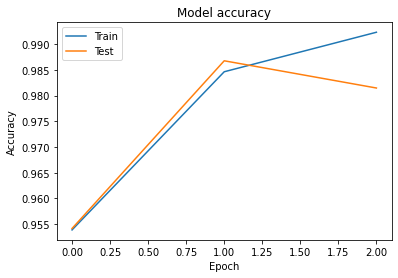

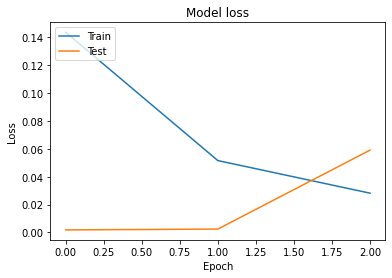

Model saved
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25

In [5]:
if os.path.exists('ir_ident_mode.h5'):
    print('Existing model found')
    model = load()
    print('Model loaded')
    if continue_training:
        model = train_validate_model(model)
        save(model)
else:
    print('No existing model present, creating/training new model')
    model = create_model()
    mode = train_validate_model(model)
    save(model)
    print('Model saved')

# predict(model)
model.summary()

In [33]:
import cv2
cur_img = cv2.imread('dataset/normal/IM-0115-0001.jpeg')
cur_img = cv2.resize(cur_img,(200,200))
cur_img =  np.expand_dims(cur_img, axis=0)
cur_img

array([[[[ 24,  24,  24],
         [ 21,  21,  21],
         [ 18,  18,  18],
         ...,
         [ 92,  92,  92],
         [ 94,  94,  94],
         [ 96,  96,  96]],

        [[ 22,  22,  22],
         [ 21,  21,  21],
         [ 18,  18,  18],
         ...,
         [ 92,  92,  92],
         [ 95,  95,  95],
         [ 95,  95,  95]],

        [[ 22,  22,  22],
         [ 21,  21,  21],
         [ 18,  18,  18],
         ...,
         [ 92,  92,  92],
         [ 94,  94,  94],
         [ 91,  91,  91]],

        ...,

        [[ 27,  27,  27],
         [ 27,  27,  27],
         [ 26,  26,  26],
         ...,
         [ 54,  54,  54],
         [ 54,  54,  54],
         [ 56,  56,  56]],

        [[ 32,  32,  32],
         [ 34,  34,  34],
         [ 31,  31,  31],
         ...,
         [ 75,  75,  75],
         [ 75,  75,  75],
         [ 77,  77,  77]],

        [[ 44,  44,  44],
         [ 45,  45,  45],
         [ 43,  43,  43],
         ...,
         [109, 109, 109],
        

In [34]:
model.predict(cur_img)

array([[0., 1.]], dtype=float32)

In [35]:
classes=['covid','normal']

In [36]:
classes[np.argmax(model.predict(cur_img))]


'normal'

In [53]:
image = cv2.imread('dataset/3.jpeg')
image.shape

(200, 200, 3)

In [54]:
1330*1187*3

4736130

In [55]:
image = image.reshape(-1,200,200,3).astype('float32')


In [50]:
200*200*3

120000

In [2]:
import keras 
model=load_model('k_model.h5')

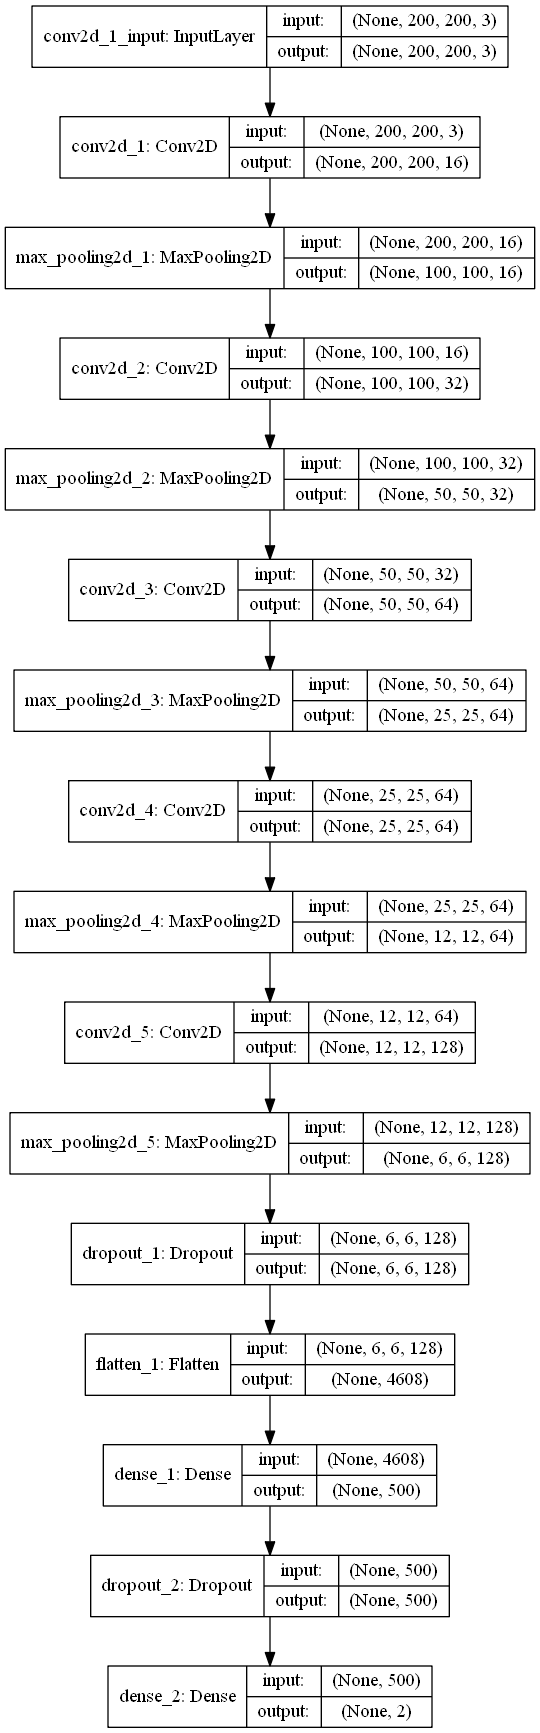

In [3]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)